In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv(r"D:\Data Science\Projects\USA Real Estate\realtor-data.csv")
df1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [5]:
df1.select_dtypes(include='object').nunique()

status              2
full_address    80599
street          79282
city             2067
state              18
sold_date        8876
dtype: int64

In [6]:
df2 = df1.drop(['full_address','street','sold_date','city','status','zip_code'],axis='columns')
df2.shape

(613159, 6)

In [7]:
df2

,price,bed,bath,acre_lot,state,house_size
0,105000,3.0,2.0,0.12,Puerto Rico,920.0
1,80000,4.0,2.0,0.08,Puerto Rico,1527.0
2,67000,2.0,1.0,0.15,Puerto Rico,748.0
3,145000,4.0,2.0,0.10,Puerto Rico,1800.0
4,65000,6.0,2.0,0.05,Puerto Rico,NaN
...,...,...,...,...,...,...
613154,429000,6.0,3.0,0.12,New Jersey,NaN
613155,1095000,5.0,5.0,0.24,New York,3140.0
613156,1500000,6.0,3.0,3.97,New Jersey,3994.0
613157,550000,11.0,3.0,0.28,New Jersey,NaN


In [8]:
df2['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware'], dtype=object)

In [9]:
df2['state'].describe()

count            613159
unique               18
top       Massachusetts
freq             175248
Name: state, dtype: object

# Data Cleaning

In [10]:
df2.isnull().sum()

price              0
bed           105700
bath           99468
acre_lot      138966
state              0
house_size    173111
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

price         0
bed           0
bath          0
acre_lot      0
state         0
house_size    0
dtype: int64

In [12]:
df3.shape

(319642, 6)

In [13]:
df3.bed.unique()

array([ 3.,  4.,  2.,  5.,  6.,  1.,  9.,  7.,  8., 12., 13., 10., 11.,
       33., 24., 28., 14., 18., 20., 16., 15., 19., 17., 40., 21., 86.,
       31., 27., 42., 60., 22., 32., 99., 49., 30., 23.])

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['house_size'].apply(is_float)].head(10)

,price,bed,bath,acre_lot,state,house_size


In [16]:
df3[~df3['bed'].apply(is_float)].head(10)

,price,bed,bath,acre_lot,state,house_size


In [17]:
df3[~df3['bath'].apply(is_float)].head(10)

,price,bed,bath,acre_lot,state,house_size


In [18]:
df3[~df3['acre_lot'].apply(is_float)].head(10)

,price,bed,bath,acre_lot,state,house_size


In [19]:
df4 = df3.copy()
df4.head()

,price,bed,bath,acre_lot,state,house_size
0,105000,3.0,2.0,0.12,Puerto Rico,920.0
1,80000,4.0,2.0,0.08,Puerto Rico,1527.0
2,67000,2.0,1.0,0.15,Puerto Rico,748.0
3,145000,4.0,2.0,0.10,Puerto Rico,1800.0
5,179000,4.0,3.0,0.46,Puerto Rico,2520.0


In [20]:
df4.state = df4.state.apply(lambda x: x.strip())
state_stats = df4['state'].value_counts(ascending=False)
state_stats

Massachusetts     103770
Connecticut        66626
Rhode Island       24620
New Hampshire      24454
Maine              23010
Vermont            22205
New Jersey         20060
New York           18101
Puerto Rico        15451
Pennsylvania         745
Virgin Islands       342
Delaware             252
Wyoming                3
West Virginia          3
Name: state, dtype: int64

In [21]:
len(state_stats[state_stats>1000])

9

In [22]:
len(state_stats[state_stats<=1000])

5

In [23]:
state_stats_less_than_1000 = state_stats[state_stats<=1000]
state_stats_less_than_1000

Pennsylvania      745
Virgin Islands    342
Delaware          252
Wyoming             3
West Virginia       3
Name: state, dtype: int64

In [24]:
len(df4.state.unique())

14

In [25]:
df4.state = df4.state.apply(lambda x: 'other' if x in state_stats_less_than_1000 else x)
len(df4.state.unique())

10

In [26]:
df4.head(10)

,price,bed,bath,acre_lot,state,house_size
0,105000,3.0,2.0,0.12,Puerto Rico,920.0
1,80000,4.0,2.0,0.08,Puerto Rico,1527.0
2,67000,2.0,1.0,0.15,Puerto Rico,748.0
3,145000,4.0,2.0,0.10,Puerto Rico,1800.0
5,179000,4.0,3.0,0.46,Puerto Rico,2520.0
6,50000,3.0,1.0,0.20,Puerto Rico,2040.0
7,71600,3.0,2.0,0.08,Puerto Rico,1050.0
8,100000,2.0,1.0,0.09,Puerto Rico,1092.0
9,300000,5.0,3.0,7.46,Puerto Rico,5403.0
10,89000,3.0,2.0,13.39,Puerto Rico,1106.0


In [27]:
df4[df4.house_size/df4.bed<300].head()

,price,bed,bath,acre_lot,state,house_size
19,140000,6.0,3.0,0.25,Puerto Rico,1230.0
28,75000,4.0,2.0,0.04,Puerto Rico,1080.0
44,95000,3.0,2.0,0.10,Puerto Rico,600.0
101,300000,4.0,2.0,10.76,Puerto Rico,547.0
133,125000,8.0,5.0,0.09,Puerto Rico,2000.0


In [28]:
df4.shape

(319642, 6)

In [29]:
df5 = df4[~(df4.house_size/df4.bed<300)]
df5.shape

(310328, 6)

In [30]:
df6 = df5.copy()
df6['price_house_sqft'] = df5['price']*100000/df5['house_size']
df6.head()

,price,bed,bath,acre_lot,state,house_size,price_house_sqft
0,105000,3.0,2.0,0.12,Puerto Rico,920.0,1.141304e+07
1,80000,4.0,2.0,0.08,Puerto Rico,1527.0,5.239031e+06
2,67000,2.0,1.0,0.15,Puerto Rico,748.0,8.957219e+06
3,145000,4.0,2.0,0.10,Puerto Rico,1800.0,8.055556e+06
5,179000,4.0,3.0,0.46,Puerto Rico,2520.0,7.103175e+06


In [31]:
df6['price'].describe()

count    3.103280e+05
mean     7.678297e+05
std      1.354323e+06
min      3.900000e+03
25%      2.899000e+05
50%      4.599000e+05
75%      7.749992e+05
max      1.000000e+08
Name: price, dtype: float64

In [32]:
df6_stats = df6['price_house_sqft'].describe()
df6_stats

count    3.103280e+05
mean     3.061901e+07
std      2.735732e+07
min      1.224541e+05
25%      1.636943e+07
50%      2.410533e+07
75%      3.539604e+07
max      9.807256e+08
Name: price_house_sqft, dtype: float64

In [33]:
df6.to_csv("bhp.csv",index=False)

In [34]:
df6['price_house_sqft'].describe()

count    3.103280e+05
mean     3.061901e+07
std      2.735732e+07
min      1.224541e+05
25%      1.636943e+07
50%      2.410533e+07
75%      3.539604e+07
max      9.807256e+08
Name: price_house_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('state'):
        m = np.mean(subdf.price_house_sqft)
        st = np.std(subdf.price_house_sqft)
        reduced_df = subdf[(subdf.price_house_sqft>(m-st)) & (subdf.price_house_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(275247, 7)

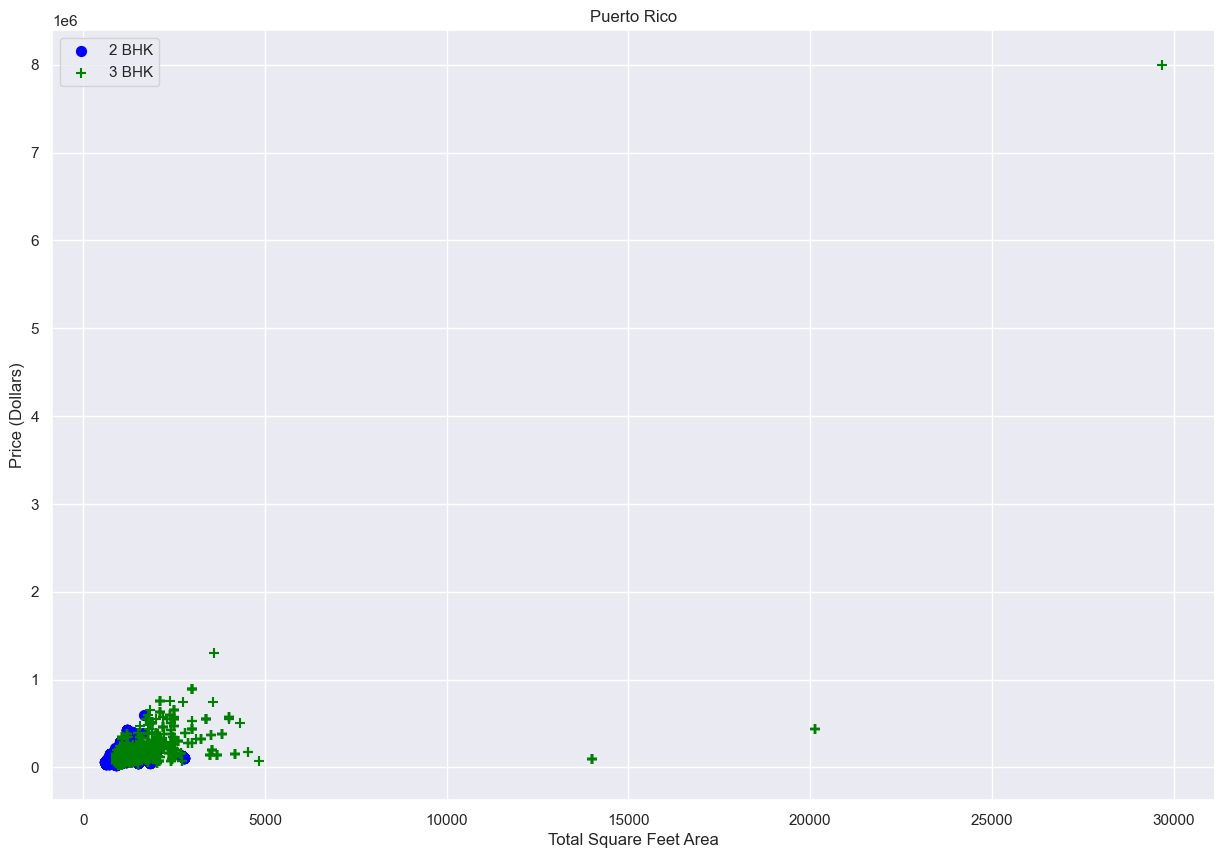

In [36]:
def plot_scatter_chart(df,state):
    bhk2 = df[(df.state==state) & (df.bed==2)]
    bhk3 = df[(df.state==state) & (df.bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.house_size,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.house_size,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Dollars)")
    plt.title(state)
    plt.legend()
    
plot_scatter_chart(df7,"Puerto Rico")

In [37]:
df7[df7.house_size<5000].count()

price               262223
bed                 262223
bath                262223
acre_lot            262223
state               262223
house_size          262223
price_house_sqft    262223
dtype: int64

In [38]:
df8 = df7[(df7.house_size<5000)]
df8.shape

(262223, 7)

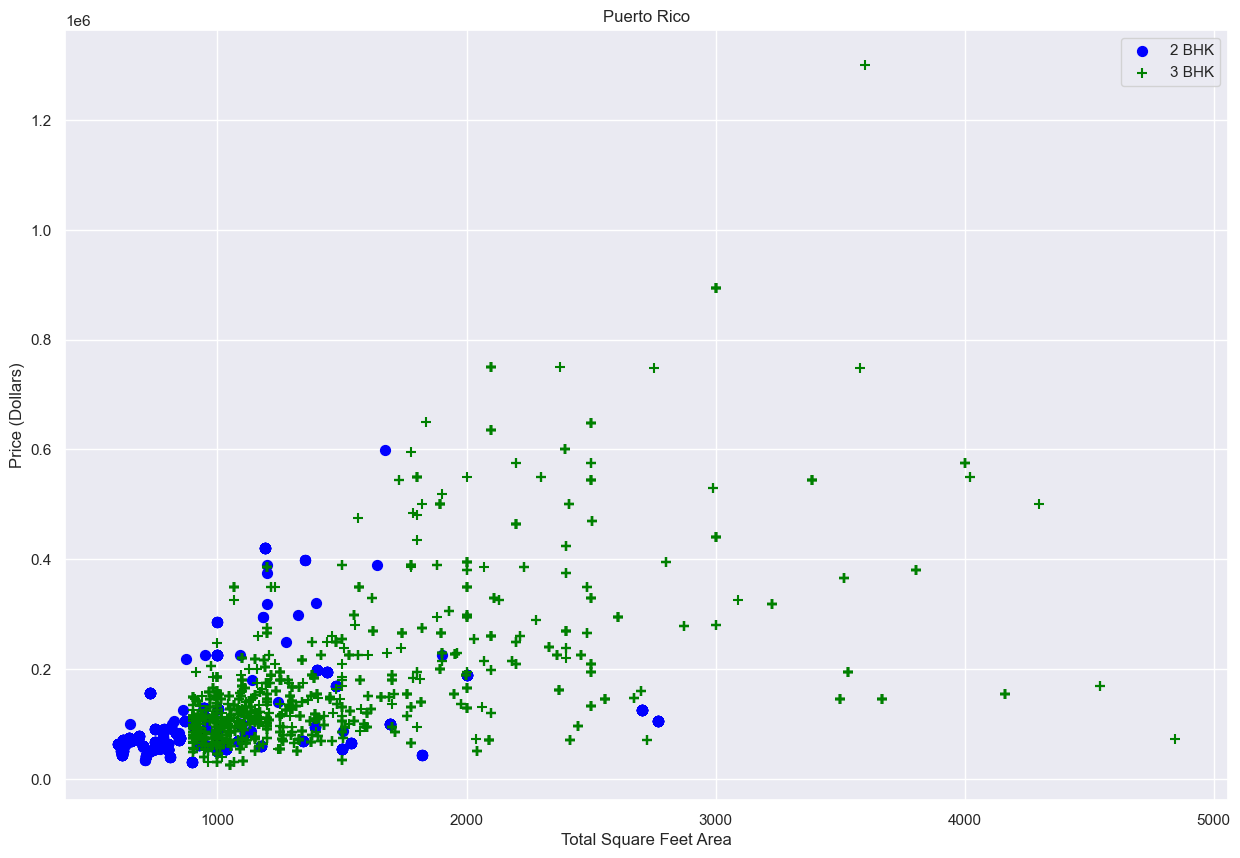

In [39]:
def plot_scatter_chart(df,state):
    bhk2 = df[(df.state==state) & (df.bed==2)]
    bhk3 = df[(df.state==state) & (df.bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.house_size,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.house_size,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Dollars)")
    plt.title(state)
    plt.legend()
    
plot_scatter_chart(df8,"Puerto Rico")

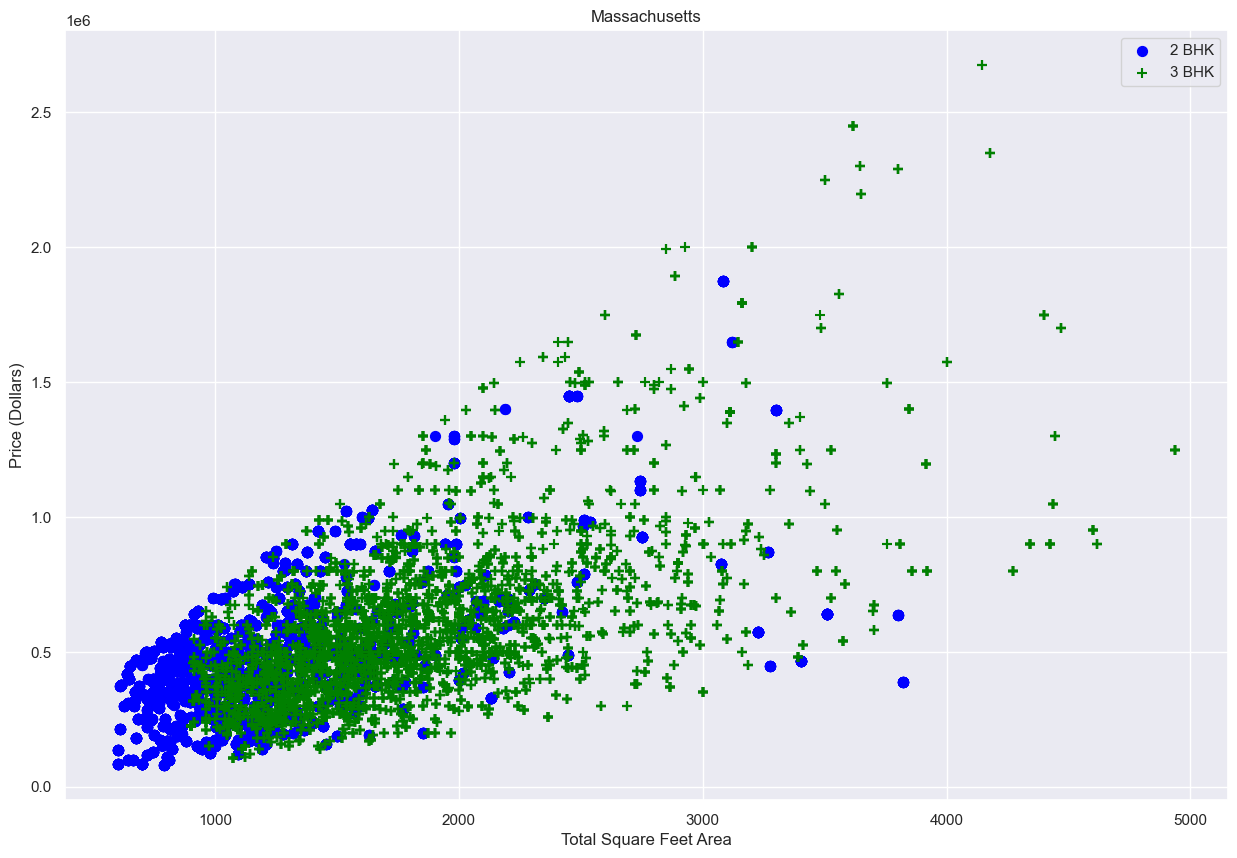

In [40]:
plot_scatter_chart(df8,"Massachusetts")


Text(0, 0.5, 'Count')

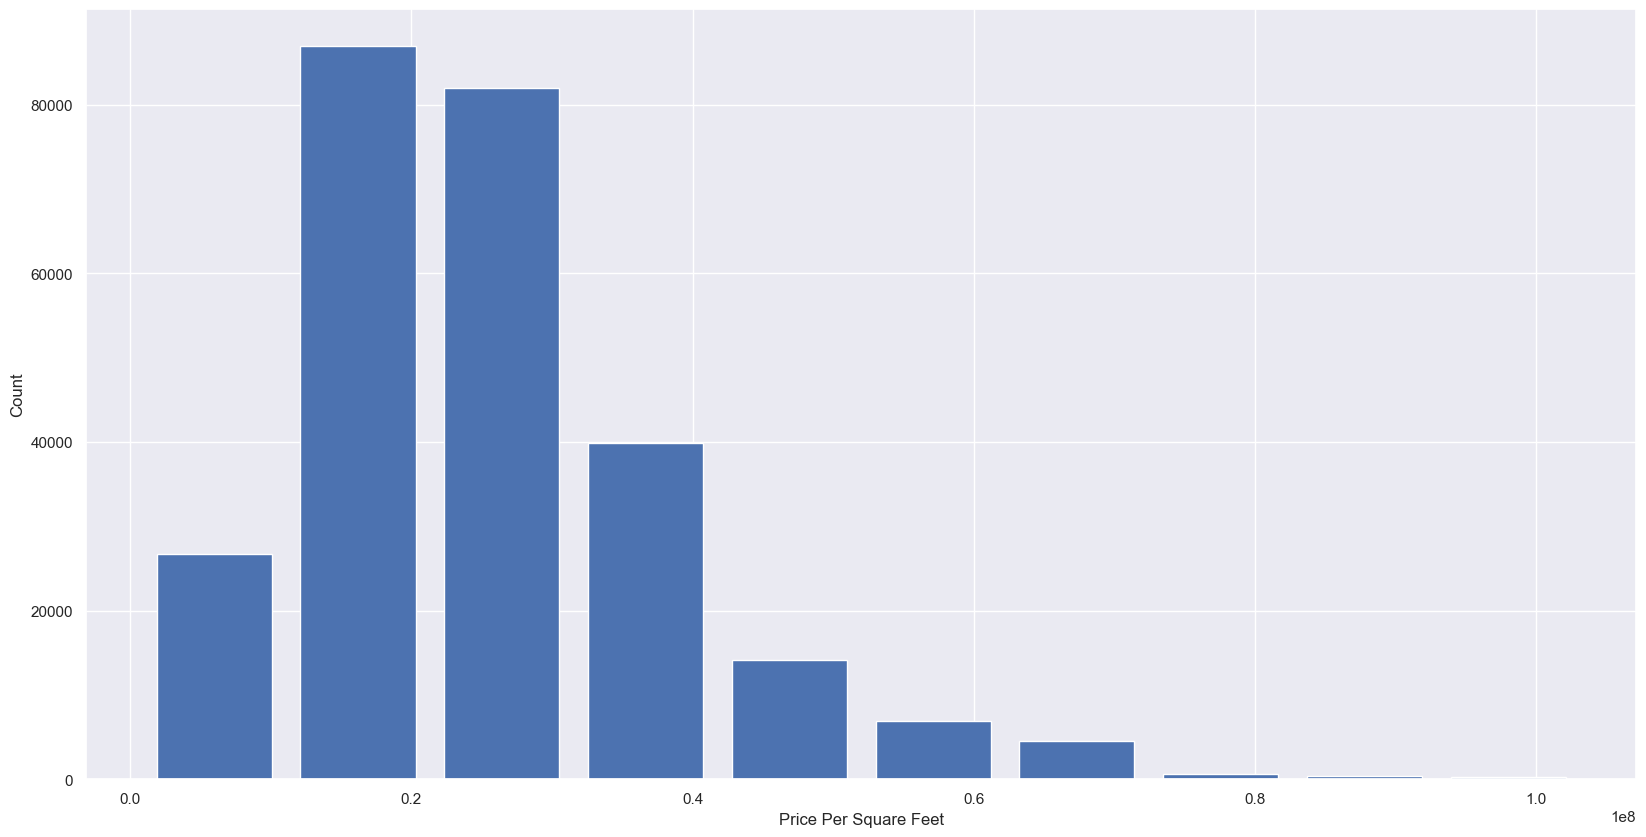

In [41]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_house_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
df8[df8.bath>8]

,price,bed,bath,acre_lot,state,house_size,price_house_sqft
30367,950000,9.0,9.0,0.45,Connecticut,4982.0,1.906865e+07
34438,950000,9.0,9.0,0.45,Connecticut,4982.0,1.906865e+07
35302,950000,9.0,9.0,0.45,Connecticut,4982.0,1.906865e+07
37859,950000,9.0,9.0,0.45,Connecticut,4982.0,1.906865e+07
39408,950000,9.0,9.0,0.45,Connecticut,4982.0,1.906865e+07
...,...,...,...,...,...,...,...
270393,989900,6.0,9.0,0.77,Vermont,4744.0,2.086636e+07
270600,989900,6.0,9.0,0.77,Vermont,4744.0,2.086636e+07
270650,989900,6.0,9.0,0.77,Vermont,4744.0,2.086636e+07
270782,989900,6.0,9.0,0.77,Vermont,4744.0,2.086636e+07


In [43]:
df8[df8.bath>df8.bed+2]

,price,bed,bath,acre_lot,state,house_size,price_house_sqft
769,425000,1.0,4.0,1.00,Connecticut,2820.0,1.507092e+07
1269,425000,1.0,4.0,1.00,Connecticut,2820.0,1.507092e+07
1574,425000,1.0,4.0,1.00,Connecticut,2820.0,1.507092e+07
1687,425000,1.0,4.0,1.00,Connecticut,2820.0,1.507092e+07
2264,425000,1.0,4.0,1.00,Connecticut,2820.0,1.507092e+07
...,...,...,...,...,...,...,...
270782,989900,6.0,9.0,0.77,Vermont,4744.0,2.086636e+07
270811,1200000,5.0,8.0,176.77,Vermont,4992.0,2.403846e+07
271691,1200000,5.0,8.0,176.77,Vermont,4992.0,2.403846e+07
271711,1295000,4.0,7.0,10.70,Vermont,4882.0,2.652601e+07


In [44]:
df9 = df8[df8.bath<df8.bed+2]
df9.shape

(260682, 7)

In [45]:
df10 = df9.drop(['price_house_sqft'],axis='columns')
df10.head(3)

,price,bed,bath,acre_lot,state,house_size
0,225000,3.0,1.0,3.93,Connecticut,1572.0
1,579900,4.0,3.0,2.34,Connecticut,3320.0
2,215000,2.0,1.0,0.91,Connecticut,960.0


# One Hot Encoding For State

In [46]:
dummies = pd.get_dummies(df10.state)
dummies.head(3)

,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont,other
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0


In [47]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,price,bed,bath,acre_lot,state,house_size,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont
0,225000,3.0,1.0,3.93,Connecticut,1572.0,1,0,0,0,0,0,0,0,0
1,579900,4.0,3.0,2.34,Connecticut,3320.0,1,0,0,0,0,0,0,0,0
2,215000,2.0,1.0,0.91,Connecticut,960.0,1,0,0,0,0,0,0,0,0
3,144900,2.0,1.0,0.36,Connecticut,860.0,1,0,0,0,0,0,0,0,0
4,174900,3.0,2.0,0.19,Connecticut,1280.0,1,0,0,0,0,0,0,0,0


In [48]:
df12 = df11.drop('state',axis='columns')
df12.head(2)

,price,bed,bath,acre_lot,house_size,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont
0,225000,3.0,1.0,3.93,1572.0,1,0,0,0,0,0,0,0,0
1,579900,4.0,3.0,2.34,3320.0,1,0,0,0,0,0,0,0,0


In [49]:
df12.shape

(260682, 14)

# ML Model

In [50]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,bed,bath,acre_lot,house_size,Connecticut,Maine,Massachusetts,New Hampshire,New Jersey,New York,Puerto Rico,Rhode Island,Vermont
0,3.0,1.0,3.93,1572.0,1,0,0,0,0,0,0,0,0
1,4.0,3.0,2.34,3320.0,1,0,0,0,0,0,0,0,0
2,2.0,1.0,0.91,960.0,1,0,0,0,0,0,0,0,0


In [51]:
y = df12.price
y.head(3)

0    225000
1    579900
2    215000
Name: price, dtype: int64

In [52]:
len(y)

260682

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5514276145973791

# K Fold cross validation

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.55214239, 0.5486488 , 0.55398505, 0.55152508, 0.54991035])

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.432e+15, tolerance: 2.914e+12
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+15, tolerance: 2.911e+12
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.486e+15, tolerance: 2.927e+12
  model = cd_fast.enet_coo

,model,best_score,best_params
0,linear_regression,0.551242,{'normalize': True}
1,lasso,0.551244,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.977454,"{'criterion': 'mse', 'splitter': 'random'}"


In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(criterion = 'mse', splitter = 'random')
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.9741985270840684

In [61]:
cv_tree = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.97487155, 0.97911966, 0.97740307, 0.9753578 , 0.97541727])